Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [8]:
import yfinance as yf

# ticker symbol for Tesla
tickerSymbol = 'TSLA'

# Get data for that ticker
tickerData = yf.Ticker(tickerSymbol)

# Get history for this ticker
tesla_data = tickerData.history(period="max")

# Print the data
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the page
url = "https://companiesmarketcap.com/tesla/revenue/"

# Send a GET request to the webpage
response = requests.get(url)

# Parse the webpage's content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table on the page
table = soup.find('table')

# Extract the table headers
headers = [header.text for header in table.find_all('th')]

# Extract the table rows
rows = table.find_all('tr')

# Extract the table data
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [element.text.strip() for element in cols]
    data.append(cols)

# Create a DataFrame from the data
tesla_revenue = pd.DataFrame(data, columns=headers)

# Print the last few rows of the DataFrame
print(tesla_revenue.tail())

    Year  Revenue   Change
10  2013  $2.01 B  387.23%
11  2012  $0.41 B  102.34%
12  2011  $0.20 B   74.95%
13  2010  $0.11 B    4.29%
14  2009  $0.11 B         


Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [10]:
import yfinance as yf

# ticker symbol for GME
tickerSymbol = 'GME'

# Get data for that ticker
tickerData = yf.Ticker(tickerSymbol)

# Get history for this ticker
gme_data = tickerData.history(period="max")

# Print the data
gme_data.reset_index(inplace=True)
print(gme_data .head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL 
url = "https://companiesmarketcap.com/gamestop/revenue/"

# Send a GET request to the webpage
response = requests.get(url)

# Parse the webpage's content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table on the page
table = soup.find('table')

# Extract the table headers
headers = [header.text for header in table.find_all('th')]

# Extract the table rows
rows = table.find_all('tr')

# Extract the table data
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [element.text.strip() for element in cols]
    data.append(cols)

# Create a DataFrame from the data
gme_revenue = pd.DataFrame(data, columns=headers)

# Print the last few rows of the DataFrame
print(gme_revenue.tail())


    Year  Revenue   Change
17  2006  $4.68 B  119.43%
18  2005  $2.13 B   21.27%
19  2004  $1.75 B   19.38%
20  2003  $1.47 B    9.45%
21  2002  $1.34 B         


Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

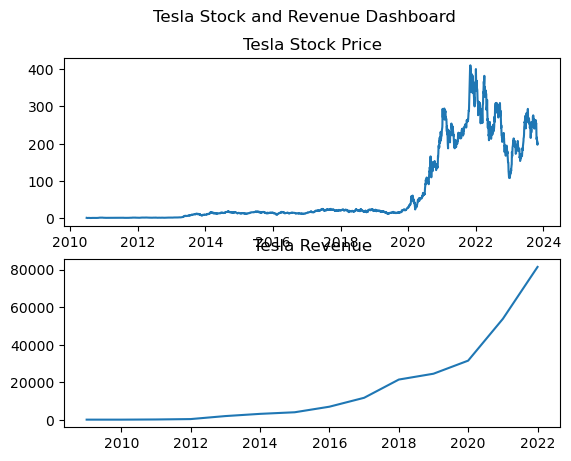

In [14]:
import matplotlib.pyplot as plt
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Tesla stock data
tickerSymbol = 'TSLA'
tickerData = yf.Ticker(tickerSymbol)
tickerDT = tickerData.history(period="max")
tickerDT.reset_index(inplace=True)

# Tesla revenue data
url = "https://companiesmarketcap.com/tesla/revenue/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')
headers = [header.text for header in table.find_all('th')]
rows = table.find_all('tr')
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [element.text.strip() for element in cols]
    data.append(cols)
revenue_df = pd.DataFrame(data, columns=headers)

# Remove rows with (TTM) in Year
revenue_df = revenue_df[~revenue_df['Year'].str.contains('TTM')]

# Convert Revenue values to float
revenue_df['Revenue'] = revenue_df['Revenue'].str.replace('$', '', regex=False)
revenue_df['Revenue'] = revenue_df['Revenue'].str.replace('K', '/1e3', regex=False).str.replace('M', '', regex=False).str.replace('B', '*1e3', regex=False).map(pd.eval).astype(float)

# Create a function to graph the stock and revenue data
def make_graph(stock_data, revenue_data, title):
    fig, axs = plt.subplots(2)
    fig.suptitle(title)

    # Plot Tesla stock data
    axs[0].plot(stock_data['Date'], stock_data['Close'])
    axs[0].set_title('Tesla Stock Price')

    # Plot Tesla revenue data
    revenue_data['Year'] = pd.to_datetime(revenue_data['Year'])
    revenue_data.sort_values('Year', inplace=True)
    axs[1].plot(revenue_data['Year'], revenue_data['Revenue'])
    axs[1].set_title('Tesla Revenue')

    plt.show()

# The make_graph function
make_graph(tickerDT, revenue_df, 'Tesla Stock and Revenue Dashboard')


Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

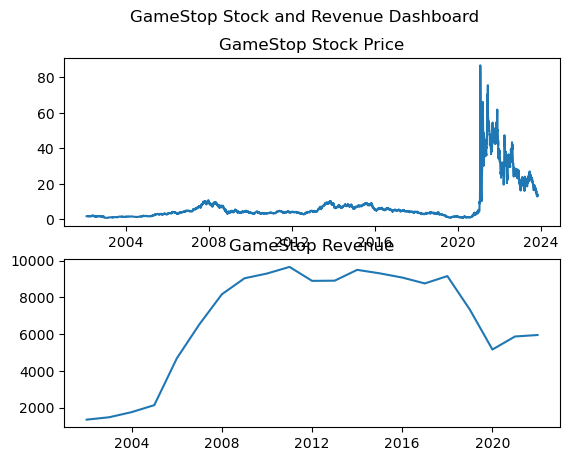

In [15]:
import matplotlib.pyplot as plt
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd

# GameStop stock data
tickerSymbol = 'GME'
tickerData = yf.Ticker(tickerSymbol)
tickerDT = tickerData.history(period="max")
tickerDT.reset_index(inplace=True)

# GameStop revenue data
url = "https://companiesmarketcap.com/gamestop/revenue/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table')
headers = [header.text for header in table.find_all('th')]
rows = table.find_all('tr')
data = []
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [element.text.strip() for element in cols]
    data.append(cols)
revenue_df = pd.DataFrame(data, columns=headers)

# Remove rows with (TTM) in Year
revenue_df = revenue_df[~revenue_df['Year'].str.contains('TTM')]

# Convert Revenue values to float
revenue_df['Revenue'] = revenue_df['Revenue'].str.replace('$', '', regex=False)
revenue_df['Revenue'] = revenue_df['Revenue'].str.replace('K', '/1e3', regex=False).str.replace('M', '', regex=False).str.replace('B', '*1e3', regex=False).map(pd.eval).astype(float)

# Create a function to graph the stock and revenue data
def make_graph(stock_data, revenue_data, title):
    fig, axs = plt.subplots(2)
    fig.suptitle(title)

    # Plot GameStop stock data
    axs[0].plot(stock_data['Date'], stock_data['Close'])
    axs[0].set_title('GameStop Stock Price')

    # Plot GameStop revenue data
    revenue_data['Year'] = pd.to_datetime(revenue_data['Year'])
    revenue_data.sort_values('Year', inplace=True)
    axs[1].plot(revenue_data['Year'], revenue_data['Revenue'])
    axs[1].set_title('GameStop Revenue')

    plt.show()

# The make_graph function
make_graph(tickerDT, revenue_df, 'GameStop Stock and Revenue Dashboard')


Question 7 - Sharing your Assignment Notebook - 2 Points

I will upload the this assignment notebook. 